In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [6]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [7]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
print(f"shape of X_train:{X_train.shape}")
print(f"shape of Y_train:{Y_train.shape}")
print()

print(f"shape of X_test:{X_test.shape}")
print(f"shape of Y_test:{Y_test.shape}")

shape of X_train:(60000, 28, 28)
shape of Y_train:(60000,)

shape of X_test:(10000, 28, 28)
shape of Y_test:(10000,)


In [9]:
X_train= X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

Data normalization


In [10]:
X_train_n = X_train/255.
X_test_n = X_test/255.

Split the data into train/validation
we keep 5000 data for validation and rest of 55,000 data for training

In [11]:
X_valid,X_train = X_train_n[:5000], X_train_n[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]
X_test = X_test_n

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3, 3),strides=1, padding='valid', activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [14]:
model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model_history= model.fit(X_train,Y_train, epochs=30,batch_size=64,
                         validation_data=(X_valid, Y_valid))

Epoch 1/30
860/860 [==============================] - 37s 43ms/step - loss: 0.1643 - accuracy: 0.9499 - val_loss: 0.0623 - val_accuracy: 0.9808
Epoch 2/30
860/860 [==============================] - 36s 42ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0540 - val_accuracy: 0.9834
Epoch 3/30
860/860 [==============================] - 37s 43ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0484 - val_accuracy: 0.9862
Epoch 4/30
860/860 [==============================] - 36s 42ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0452 - val_accuracy: 0.9870
Epoch 5/30
860/860 [==============================] - 36s 42ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0491 - val_accuracy: 0.9876
Epoch 6/30
860/860 [==============================] - 36s 42ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0533 - val_accuracy: 0.9868
Epoch 7/30
860/860 [==============================] - 36s 42ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0501 - val_accuracy:

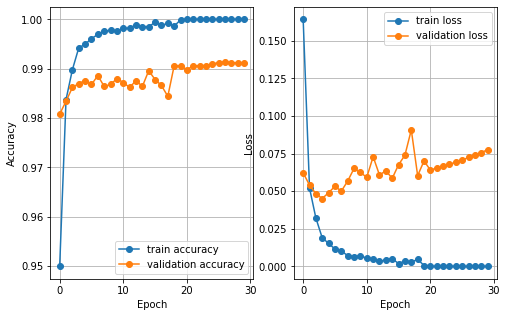

In [18]:
plt.figure(figsize=(8 , 5))
plt.subplot(1,2,1)
plt.plot(model_history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(model_history.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(model_history.history['loss'], 'o-', label='train loss')
plt.plot(model_history.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.0764 - accuracy: 0.9895

Test Accuracy: 0.9894999861717224

Test Loss: 0.07639241218566895


**Analyze the affect of using and not using data normalization**

We need to normalize the data dimensions so that they are approximately in the same scale. All our values in the range of 0 to 255 so we are going to divide our entire data set by 255 so all our values can set up between 0 and 1. Speed up of training a model is the good effect of data normalization. By data normalization, we can transform all data in a specific range. It also reduces the complexity of data. All the affect is for using data normalization when we are traing  a model. 